In [1]:
# data explore
from glob import glob
from os.path import join, basename
# sequence_len,478,3
data_root = "/data/agent_h/face_text_windows_v3/"
data_ids = sorted([basename(x[:-5]) for x in glob(join(data_root,"*.json"))])

print(len(data_ids))
print(data_ids[0])

1849
0042636a-2f2b-49e6-bb40-65b402553ae8


2024-05-18 17:06:05.502967: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 17:06:05.543338: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 17:06:06.197736: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


(100, 375, 478, 3)


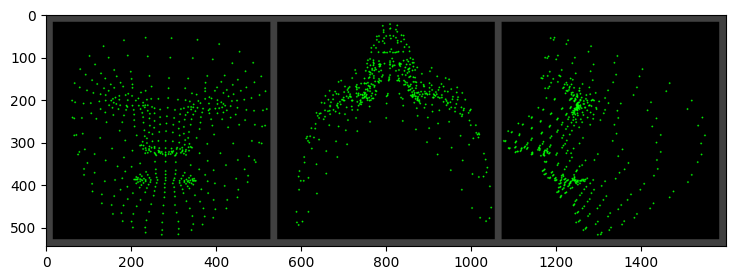

In [2]:
# data analysis and vis
import numpy as np
from mediapipe_util import show_img_np
import cv2
from datagen_ops import *

data_id = data_ids[0]
landmark_batch = np.load(join(data_root,data_id+".npz"))['arr_0']
print(landmark_batch.shape)



landmarks = normalize_landmarks(landmark_batch[1])
save_landmarks_video(landmarks)
canvas = vis_landmark_2d(landmarks[1])
show_img_np(canvas)

# show 3 image 
    
    
    


In [14]:
a = np.array([[1,2,3],[4,5,6]])
np.min(a,axis=-1)

array([1, 4])

/home/agent_h/miniconda3/envs/vsr3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['<pad><extra_id_0>stranger<extra_id_1>stranger<extra_id_2>1<extra_id_3>ice<extra_id_4> a<extra_id_5> A stranger<extra_id_6>strangers are the ones who<extra_id_7> <extra_id_48><extra_id_48><0x0A><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48><extra_id_48>']


/home/agent_h/miniconda3/envs/vsr3/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
MovieWriter imagemagick unavailable; using Pillow instead.


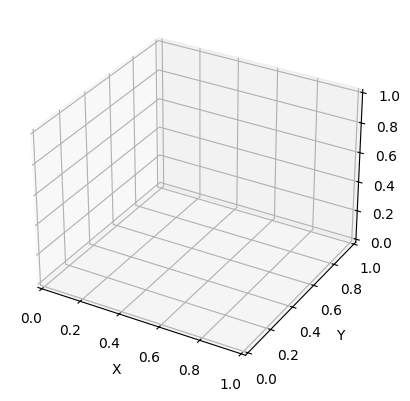

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        line.set_data_3d(walk[:num, :].T)
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the Axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

ani.save("tmp.gif",writer='imagemagick')

In [10]:
# modeling and converting

In [11]:
# training

In [12]:
# inference

In [13]:
# eval